# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv("Bank-data.csv")

In [3]:
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [4]:
raw_data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
data = raw_data.copy()
x1 = data["duration"]
y = data["y"].map({"yes": 1, "no": 0})

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
reg = sm.Logit(y, x)
results = reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 May 2020   Pseudo R-squ.:                  0.2121
Time:                        14:58:07   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

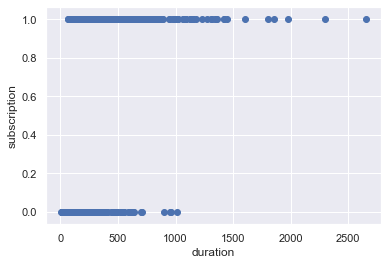

In [7]:
plt.scatter(x1, y)
plt.xlabel("duration")
plt.ylabel("subscription")
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [8]:
x1 = data[["interest_rate", "march", "credit", "previous", "duration"]]

In [9]:
x = sm.add_constant(x1)
reg = sm.Logit(y, x)
result = reg.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.514     
Dependent Variable: y                AIC:              360.7836  
Date:               2020-05-18 14:58 BIC:              386.2834  
No. Observations:   518              Log-Likelihood:   -174.39   
Df Model:           5                LL-Null:          -359.05   
Df Residuals:       512              LLR p-value:      1.2114e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [10]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy